In [26]:
import bagpy
import math
from math import radians, cos, sin, asin, sqrt, pi
from bagpy import bagreader
import pandas as pd
import statistics
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [27]:
b = bagreader("/home/krishna/LAB2/src/gnss_driver/data/occluded_walking.bag")

[INFO]  Data folder /home/krishna/LAB2/src/gnss_driver/data/occluded_walking already exists. Not creating.


In [28]:
#extract csv from bag files
def data_csv(b):

    csvfiles = []
    for t in b.topics:
        data = b.message_by_topic(t)
        csvfiles.append(data)

    print(csvfiles[0])
    data = pd.read_csv(csvfiles[0])
    return data

In [29]:
csv_data = data_csv(b)

/home/krishna/LAB2/src/gnss_driver/data/occluded_walking/gps.csv


In [30]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/gps,gnss_driver/gps_msg,27,0.999481


In [31]:
df_gps = pd.read_csv("/home/krishna/LAB2/src/gnss_driver/data/occluded_walking/gps.csv")

In [32]:
df_gps

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,Fix_quality,UTM_easting,UTM_northing,UTC,Zone,Letter
0,1.677021e+09,21,231444,0,GPS1_Frame,42.308220,-71.106026,18.100000,1.76,5,326424.34375,4686146.0,231444.0,19,T
1,1.677021e+09,22,231504,0,GPS1_Frame,42.308239,-71.106071,20.200001,1.28,5,326420.46875,4686148.5,231504.0,19,T
2,1.677021e+09,23,231506,0,GPS1_Frame,42.308231,-71.106079,20.299999,1.21,5,326419.96875,4686147.5,231506.0,19,T
3,1.677021e+09,24,231507,0,GPS1_Frame,42.308228,-71.106087,20.500000,1.02,5,326419.68750,4686147.5,231507.0,19,T
4,1.677021e+09,25,231508,0,GPS1_Frame,42.308228,-71.106087,20.500000,0.96,5,326419.21875,4686147.0,231508.0,19,T
5,1.677021e+09,26,231509,0,GPS1_Frame,42.308220,-71.106094,20.700001,0.96,5,326418.71875,4686146.5,231509.0,19,T
6,1.677021e+09,27,231510,0,GPS1_Frame,42.308216,-71.106102,20.400000,0.96,5,326418.28125,4686146.0,231510.0,19,T
7,1.677021e+09,28,231511,0,GPS1_Frame,42.308208,-71.106110,20.200001,0.96,5,326417.71875,4686145.0,231511.0,19,T
8,1.677021e+09,29,231512,0,GPS1_Frame,42.308205,-71.106110,20.200001,0.96,5,326417.37500,4686145.0,231512.0,19,T
9,1.677021e+09,30,231513,0,GPS1_Frame,42.308205,-71.106117,21.100000,1.07,5,326416.93750,4686144.5,231513.0,19,T


In [33]:
#median data

df_gps['UTM_easting_median'] = df_gps['UTM_easting'] - df_gps['UTM_easting'].median(axis=0)
df_gps['UTM_northing_median'] = df_gps['UTM_northing'] - df_gps['UTM_northing'].median(axis=0)

In [34]:
df_gps['UTM_easting'].median(axis=0), df_gps['UTM_northing'].median(axis=0)

(326420.46875, 4686145.5)

In [35]:
df_gps['UTM_easting_median'], df_gps['UTM_northing_median'] 

(0     3.87500
 1     0.00000
 2    -0.50000
 3    -0.78125
 4    -1.25000
 5    -1.75000
 6    -2.18750
 7    -2.75000
 8    -3.09375
 9    -3.53125
 10   -4.09375
 11   -4.34375
 12   -4.71875
 13   -5.12500
 14   -5.50000
 15    0.43750
 16    0.68750
 17    0.93750
 18    1.28125
 19    1.59375
 20    1.90625
 21    2.06250
 22    2.34375
 23    3.18750
 24    3.53125
 25    3.62500
 26    3.71875
 Name: UTM_easting_median, dtype: float64,
 0     0.5
 1     3.0
 2     2.0
 3     2.0
 4     1.5
 5     1.0
 6     0.5
 7    -0.5
 8    -0.5
 9    -1.0
 10   -1.0
 11   -1.0
 12   -1.5
 13   -1.5
 14   -2.0
 15   -3.0
 16   -2.5
 17   -2.0
 18   -1.5
 19   -1.0
 20    0.0
 21    0.5
 22    1.0
 23    2.0
 24    2.5
 25    2.5
 26    3.0
 Name: UTM_northing_median, dtype: float64)

/home/krishna/miniconda3/envs/RSN/lib/python3.10/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


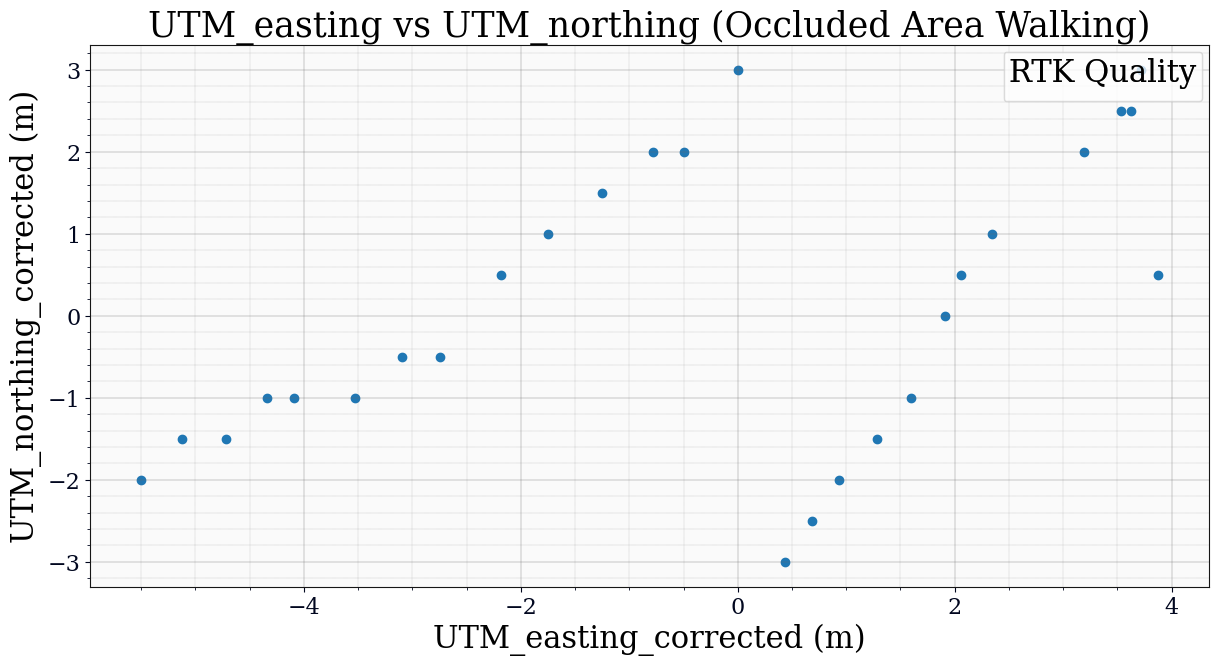

In [36]:
#corrected - the minimum of the each data in easting and northing was subtracted 
#from the  easting and northing datapoints respectively. 
fig, ax = bagpy.create_fig(1)
scatter = ax[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=df_gps)
plt.title("UTM_easting vs UTM_northing (Occluded Area Walking)", fontsize=25)
legend1 = ax[0].legend(*scatter.legend_elements(), loc="upper right", title="RTK Quality")
ax[0].add_artist(legend1)
plt.xlabel("UTM_easting_corrected (m)")
plt.ylabel("UTM_northing_corrected (m)")
plt.show()


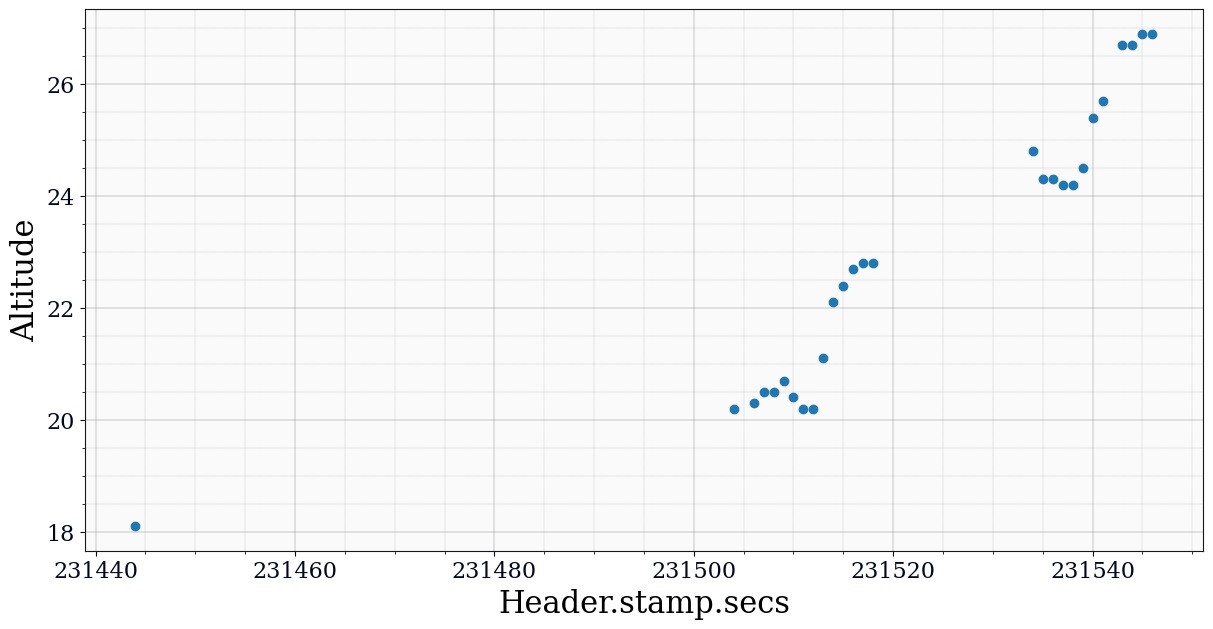

In [37]:
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='Header.stamp.secs', y='Altitude', data=df_gps)
plt.xlabel("Header.stamp.secs")

plt.ylabel("Altitude")
plt.show()

In [38]:
#mean, variance

[ df_gps['Altitude'].mean(), df_gps['Altitude'].var() ]

[22.9481482329192, 6.417207566720865]

In [39]:
def distanceInKmBetweenEarthCoordinates(a1 , b1, a2, b2):
  return math.sqrt((a1-a2)**2 + (b1-b2)**2)

northing_original = 4686126.5
easting_original = 326315.78125

distance_error = []

for i in range(df_gps.shape[0]):

  answer = distanceInKmBetweenEarthCoordinates(df_gps.UTM_easting[i], df_gps.UTM_northing[i], easting_original, northing_original)

  distance_error.append(answer)

mean = statistics.mean(distance_error)

stdev = statistics.stdev(distance_error)

print("Mean:", mean)
print("Standard deviation:", stdev)

Mean: 106.0482334512535
Standard deviation: 3.1210388614880737
